## Library Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
crop_yield_data = pd.read_csv("../data/crop_yield.csv")
crop_yield_data.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [5]:
crop_yield_data.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


In [6]:
crop_yield_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


## Access Data Quality

1. Data Quality Check : Missing values, Outliers, Duplicates, Unique Values Data types
2. Data Tidiness : Format, Consistency, Completeness, Accuracy
3. Correlation : Correlation between the variables
4. Data Visualization : Visualize the data to understand the data better


In [7]:
crop_yield_data.isnull().any()

Region                    False
Soil_Type                 False
Crop                      False
Rainfall_mm               False
Temperature_Celsius       False
Fertilizer_Used           False
Irrigation_Used           False
Weather_Condition         False
Days_to_Harvest           False
Yield_tons_per_hectare    False
dtype: bool

In [8]:
crop_yield_data.duplicated().any()

False

In [14]:
categorical_cols = crop_yield_data.select_dtypes(include='object').columns  
for col in categorical_cols:
    print(f"{col}: {crop_yield_data[col].unique()}")


Region: ['West' 'South' 'North' 'East']
Soil_Type: ['Sandy' 'Clay' 'Loam' 'Silt' 'Peaty' 'Chalky']
Crop: ['Cotton' 'Rice' 'Barley' 'Soybean' 'Wheat' 'Maize']
Weather_Condition: ['Cloudy' 'Rainy' 'Sunny']


### Outlier Detection

<Axes: xlabel='Yield_tons_per_hectare'>

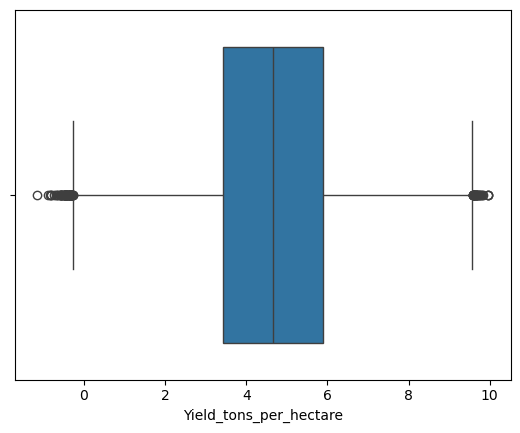

In [9]:

sns.boxplot(x=crop_yield_data['Yield_tons_per_hectare'])

<Axes: xlabel='Temperature_Celsius'>

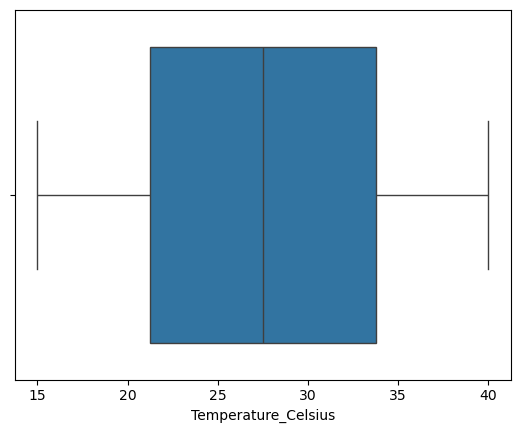

In [10]:
sns.boxplot(x=crop_yield_data['Temperature_Celsius'])

<Axes: xlabel='Rainfall_mm'>

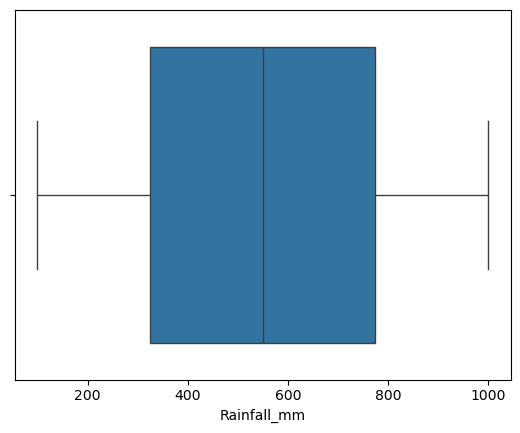

In [11]:
sns.boxplot(x=crop_yield_data['Rainfall_mm'])

<Axes: xlabel='Days_to_Harvest'>

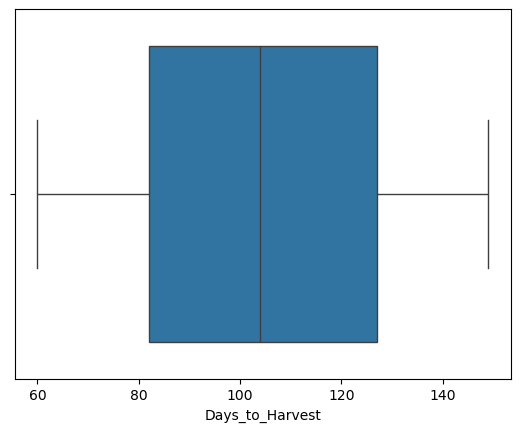

In [13]:
sns.boxplot(x=crop_yield_data['Days_to_Harvest'])

In [20]:
numeric_columns= crop_yield_data.select_dtypes(include='number')
correlation_matrix= numeric_columns.corr()
correlation_matrix

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
Rainfall_mm,1.000000,-0.000123,-0.002669,0.764618
Temperature_Celsius,-0.000123,1.000000,-0.000731,0.085565
Days_to_Harvest,-0.002669,-0.000731,1.000000,-0.002591
Yield_tons_per_hectare,0.764618,0.085565,-0.002591,1.000000


Strong positive correlation between yield and rainfall


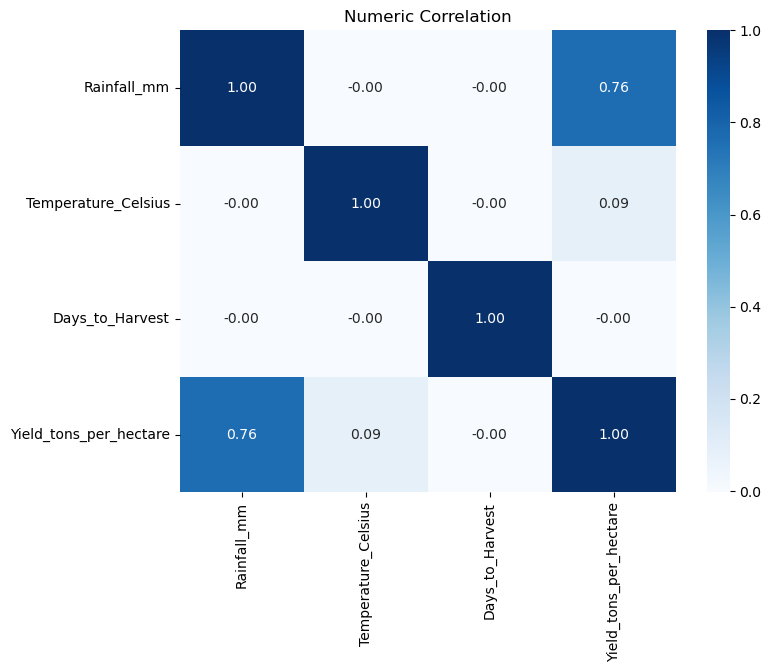

In [39]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True,  fmt=".2f", cmap="Blues")
plt.title("Numeric Correlation")
plt.show()

<Axes: xlabel='Rainfall_mm', ylabel='Yield_tons_per_hectare'>

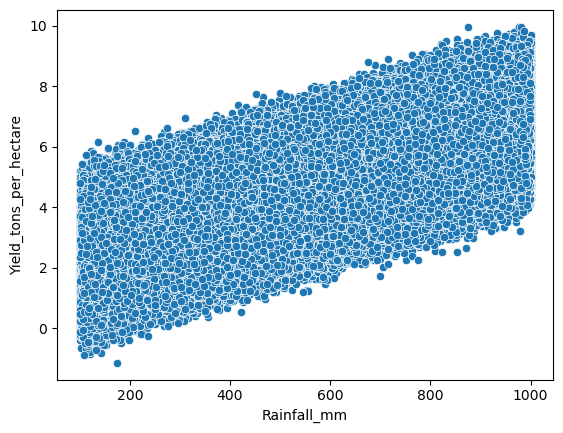

In [ ]:
sns.scatterplot(x='Rainfall_mm',y='Yield_tons_per_hectare',data=crop_yield_data)

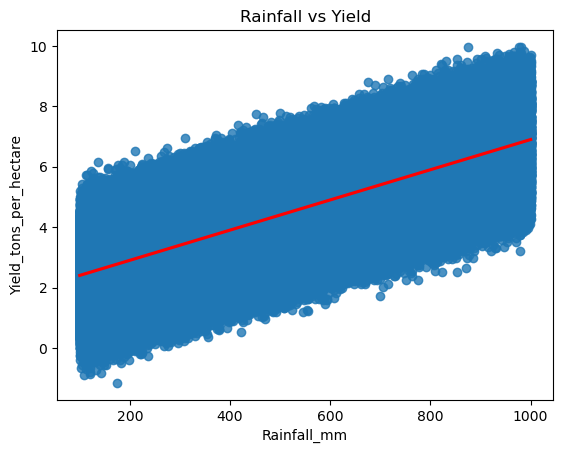

In [48]:
sns.regplot(x='Rainfall_mm', y='Yield_tons_per_hectare', data=crop_yield_data, scatter=True, line_kws={'color': 'red'})
plt.title("Rainfall vs Yield")
plt.show()

## Yield amount


NOTE: differnce in amount is not much I changed the scale to log to get a clear picture 
TODO: Change colour and scale to line

#### 1. Yield by region

In [63]:
yield_per_region =crop_yield_data.groupby('Region')['Yield_tons_per_hectare'].sum()
yield_per_region 

Region
East     1.160000e+06
North    1.164334e+06
South    1.162462e+06
West     1.162677e+06
Name: Yield_tons_per_hectare, dtype: float64

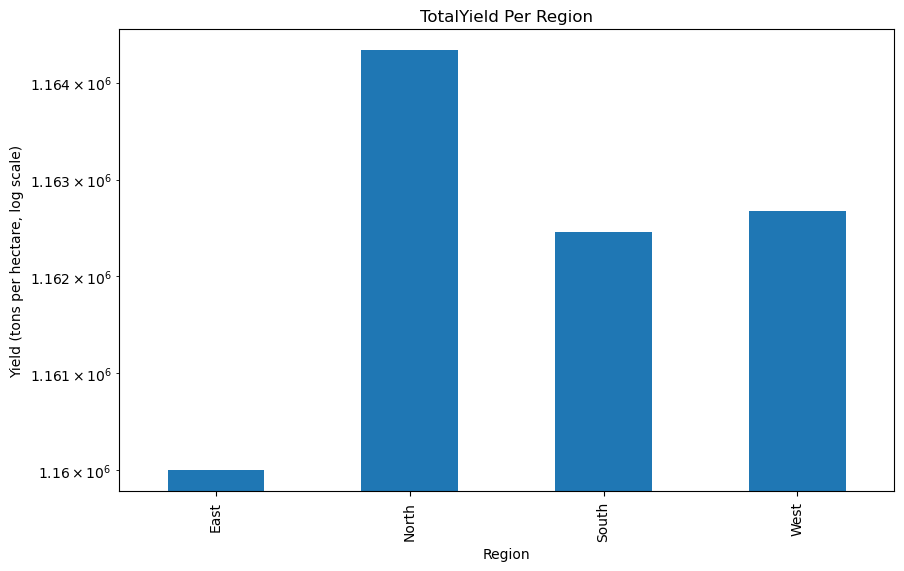

In [ ]:
yield_per_region.plot(kind='bar', figsize=(10,6))
plt.title('TotalYield Per Region')
plt.yscale('log')  
plt.ylabel('Yield (tons per hectare, log scale)')
plt.show()

### 2. Yield by Crop

In [72]:
yield_per_crop = crop_yield_data.groupby('Crop')['Yield_tons_per_hectare'].sum()
yield_per_crop

Crop
Barley     775081.348037
Cotton     774760.319467
Maize      774294.815533
Rice       775709.573640
Soybean    774140.272630
Wheat      775486.158356
Name: Yield_tons_per_hectare, dtype: float64

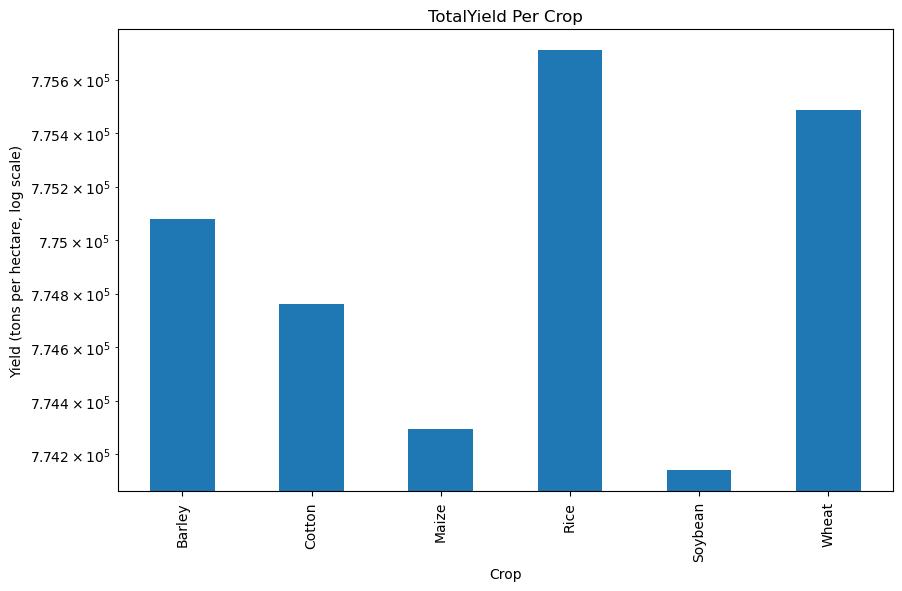

In [75]:
yield_per_crop.plot(kind='bar', figsize=(10,6))
plt.title('TotalYield Per Crop')
plt.yscale('log')  
plt.ylabel('Yield (tons per hectare, log scale)')
plt.show()

## Effect on yield

1. Does fertilizer usage improve yield?
2. Does irrigation usage improve yield?
3. Does soil type affect yield?
5. Does rainfall affect yield?
6. Does temperature affect yield?



### 1. Fertilizer

In [32]:
mean_yield_per_fertilizer =crop_yield_data.groupby('Fertilizer_Used')['Yield_tons_per_hectare'].mean()
mean_yield_per_fertilizer 

Fertilizer_Used
False    3.899509
True     5.399616
Name: Yield_tons_per_hectare, dtype: float64

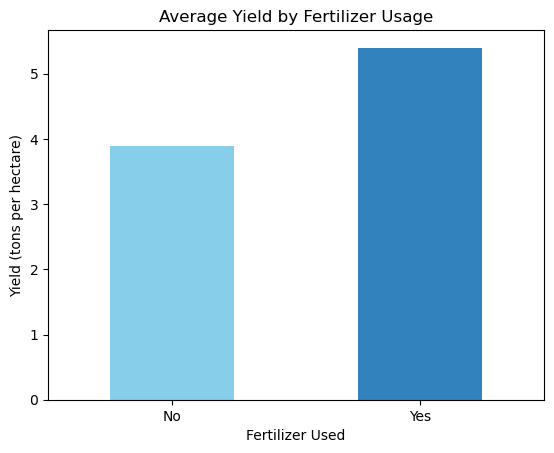

In [ ]:
mean_yield_per_fertilizer.plot(kind='bar', color=['skyblue', '#3182bd'])
plt.title('Average Yield by Fertilizer Usage')
plt.xlabel('Fertilizer Used')
plt.ylabel('Yield (tons per hectare)')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'], rotation=0)  
plt.show()

### 2. Irrigation

In [35]:
mean_yield_per_irrigation = crop_yield_data.groupby('Irrigation_Used')['Yield_tons_per_hectare'].mean()
mean_yield_per_irrigation 

Irrigation_Used
False    4.049936
True     5.250231
Name: Yield_tons_per_hectare, dtype: float64

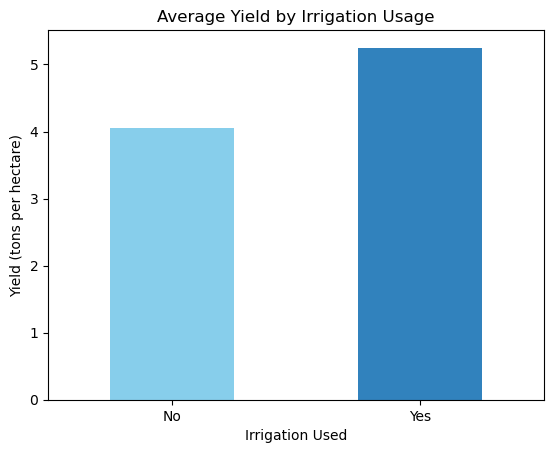

In [ ]:
mean_yield_per_irrigation.plot(kind='bar', color=['skyblue', '#3182bd'])
plt.title('Average Yield by Irrigation Usage')
plt.xlabel('Irrigation Used')
plt.ylabel('Yield (tons per hectare)')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'], rotation=0)  
plt.show()

### Cross-tabulation 

In [69]:
yield_table_by_soil_type =pd.crosstab(crop_yield_data['Crop'], crop_yield_data['Soil_Type'], values=crop_yield_data['Yield_tons_per_hectare'], aggfunc='mean')
yield_table_by_soil_type

Soil_Type,Chalky,Clay,Loam,Peaty,Sandy,Silt
Crop,,,,,,
Barley,4.649948,4.651793,4.643126,4.650058,4.658929,4.630665
Cotton,4.663595,4.645118,4.633848,4.647561,4.652088,4.662891
Maize,4.653498,4.630174,4.666891,4.635270,4.632811,4.629473
Rice,4.640907,4.646297,4.651742,4.657866,4.654259,4.653537
Soybean,4.657995,4.651116,4.639517,4.661625,4.656205,4.655866
Wheat,4.651330,4.644797,4.671253,4.654183,4.636889,4.658146


In [70]:
yield_table_by_region = pd.crosstab(crop_yield_data['Crop'], crop_yield_data['Region'], values=crop_yield_data['Yield_tons_per_hectare'], aggfunc='mean')
yield_table_by_region 

Region,East,North,South,West
Crop,,,,
Barley,4.647464,4.658517,4.646562,4.637084
Cotton,4.650924,4.656644,4.650230,4.645582
Maize,4.640522,4.646604,4.641953,4.636456
Rice,4.644372,4.641199,4.647375,4.670144
Soybean,4.640397,4.659754,4.656325,4.658560
Wheat,4.649932,4.662084,4.650636,4.648217


In [71]:
yield_table_by_weather = pd.crosstab(crop_yield_data['Crop'], crop_yield_data['Weather_Condition'], values=crop_yield_data['Yield_tons_per_hectare'], aggfunc='mean')
yield_table_by_weather 

Weather_Condition,Cloudy,Rainy,Sunny
Crop,,,
Barley,4.654291,4.628649,4.659419
Cotton,4.644242,4.655776,4.652442
Maize,4.641658,4.638430,4.644067
Rice,4.643424,4.660507,4.648313
Soybean,4.647624,4.657156,4.656385
Wheat,4.651985,4.655280,4.650975
